In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
mtasubwayfile = "../New-York-Transportation/Raw Data/MTA_Subway.csv"
sub_data = pd.read_csv(mtasubwayfile); sub_data = sub_data[84:111]
#sub_data

In [4]:
mtabusfile = "../New-York-Transportation/Raw Data/MTA_Bus 08-Apr_17.csv"
bus_data = pd.read_csv(mtabusfile); bus_data = bus_data[:28]
#bus_data

In [5]:
mtatollfile = "../New-York-Transportation/Raw Data/MTA_Toll.csv"
toll_data = pd.read_csv(mtatollfile); toll_data = toll_data[84:111]
#toll_data

In [6]:
mtacommfile_north = "../New-York-Transportation/Raw Data/MTA_Coummuter_Train_North.csv"
comm_north_data = pd.read_csv(mtacommfile_north); comm_north_data = comm_north_data[84:112]
#comm_north_data

In [7]:
mtacommfile_long = "../New-York-Transportation/Raw Data/MTA_Commuter_Train_Long_Island.csv"
comm_long_data = pd.read_csv(mtacommfile_long); comm_long_data = comm_long_data[84:112]
#comm_long_data

In [8]:
proj_data = sub_data
proj_data = proj_data.append(bus_data).append(toll_data).append(comm_north_data).append(comm_long_data)
#proj_data

In [9]:
proj_data_all = proj_data.reset_index(drop=True).drop(['PARENT_SEQ', 'INDICATOR_SEQ', 'DESCRIPTION', 'INDICATOR_UNIT',
                                                   'DESIRED_CHANGE','DECIMAL_PLACES', 'FREQUENCY', 'YTD_TARGET', 
                                                   'MONTHLY_TARGET','CATEGORY', 'INDICATOR_NAME'],axis=1)
#proj_data_all

In [10]:
yearly_transit_data = proj_data_all.groupby(proj_data_all['PERIOD_YEAR']).sum().drop(
    ['PERIOD_MONTH'], axis=1).reset_index(drop=False)
yearly_transit_data

,PERIOD_YEAR,YTD_ACTUAL,MONTHLY_ACTUAL
0,2015.0,1.508270e+10,2.358899e+09
1,2016.0,1.524631e+10,2.365547e+09
2,2017.0,1.151823e+09,5.731450e+08


In [11]:
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_15 = proj_data_all[proj_data_all['PERIOD_YEAR']==2015]
data_16 = proj_data_all[proj_data_all['PERIOD_YEAR']==2016]
data_17 = proj_data_all[proj_data_all['PERIOD_YEAR']==2017]
data_multi_year = data_15.append(data_16).append(data_17)
data_multi_year['PERIOD_YEAR'] = data_multi_year['PERIOD_YEAR'].astype('int64', copy=False)

In [12]:
data_multi_year["PLOT_DATE"] = data_multi_year['PERIOD_YEAR'].map(str) + data_multi_year['PERIOD_MONTH'].map(str)

In [13]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
people_sub = data_multi_year[data_multi_year['AGENCY_NAME']=='NYC Transit']
people_sub['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']
people_sub.set_index(people_sub['PLOT_LABELS'], drop=False)

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,AGENCY_NAME,PERIOD_YEAR,PERIOD_MONTH,YTD_ACTUAL,MONTHLY_ACTUAL,PLOT_DATE,PLOT_LABELS
PLOT_LABELS,,,,,,,
Jan-15,NYC Transit,2015,1.0,1.337699e+08,133769924.0,20151.0,Jan-15
Feb-15,NYC Transit,2015,2.0,2.645482e+08,130778251.0,20152.0,Feb-15
Mar-15,NYC Transit,2015,3.0,4.176251e+08,153076928.0,20153.0,Mar-15
Apr-15,NYC Transit,2015,4.0,5.679733e+08,150348150.0,20154.0,Apr-15
May-15,NYC Transit,2015,5.0,7.193922e+08,151418931.0,20155.0,May-15
Jun-15,NYC Transit,2015,6.0,8.714265e+08,152034275.0,20156.0,Jun-15
Jul-15,NYC Transit,2015,7.0,1.019525e+09,148098272.0,20157.0,Jul-15
Aug-15,NYC Transit,2015,8.0,1.159499e+09,139974023.0,20158.0,Aug-15
Sep-15,NYC Transit,2015,9.0,1.306014e+09,146515000.0,20159.0,Sep-15


In [14]:
people_bus = data_multi_year[data_multi_year['AGENCY_NAME']=='MTA Bus']; people_bus = people_bus[:-1]
people_bus['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']

In [15]:
people_long = data_multi_year[data_multi_year['AGENCY_NAME']=='Long Island Rail Road']
people_long['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
people_north = data_multi_year[data_multi_year['AGENCY_NAME']=='Metro-North Railroad']
people_north['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
people_toll = data_multi_year[data_multi_year['AGENCY_NAME']=='Bridges and Tunnels']
people_toll['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


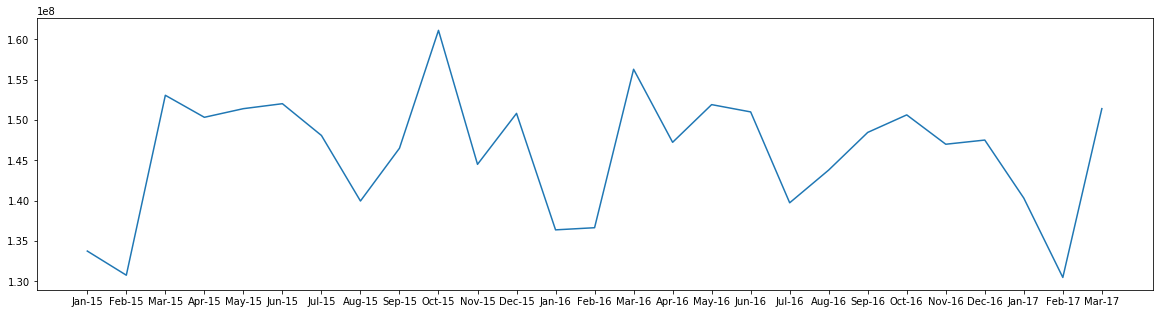

In [18]:
plt.figure(figsize=(20,5))
sub_chart = plt.plot(people_sub['PLOT_LABELS'], people_sub['MONTHLY_ACTUAL'])

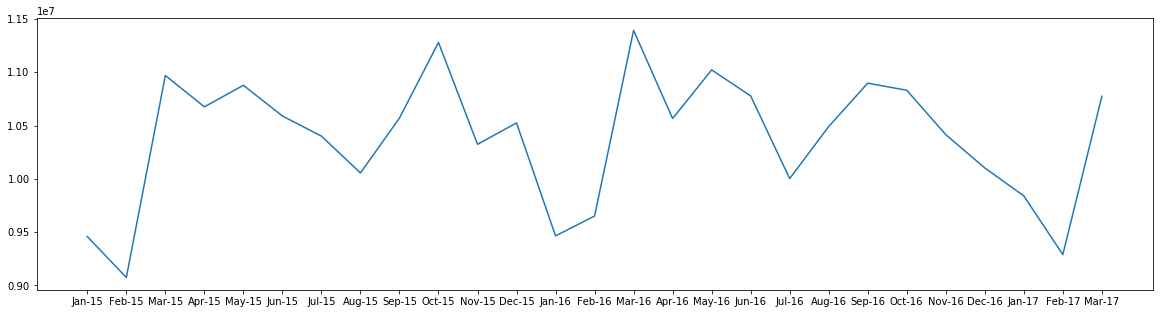

In [19]:
plt.figure(figsize=(20,5))
bus_chart = plt.plot(people_bus['PLOT_LABELS'], people_bus['MONTHLY_ACTUAL'])

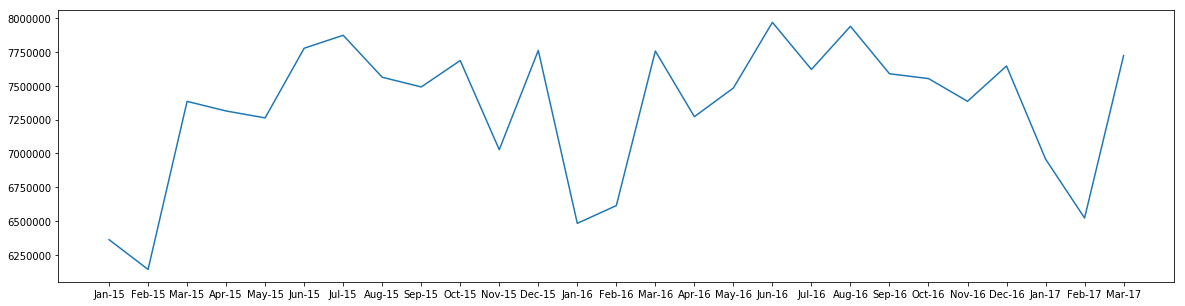

In [20]:
plt.figure(figsize=(20,5))
long_chart = plt.plot(people_long['PLOT_LABELS'], people_long['MONTHLY_ACTUAL'])

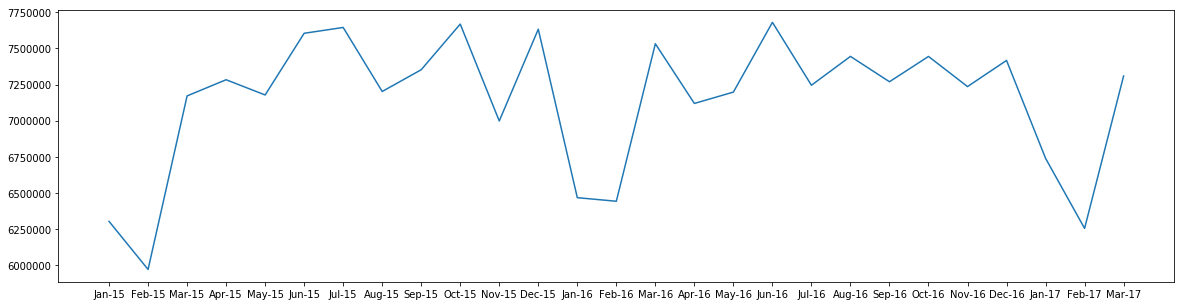

In [21]:
plt.figure(figsize=(20,5))
north_chart = plt.plot(people_north['PLOT_LABELS'], people_north['MONTHLY_ACTUAL'])

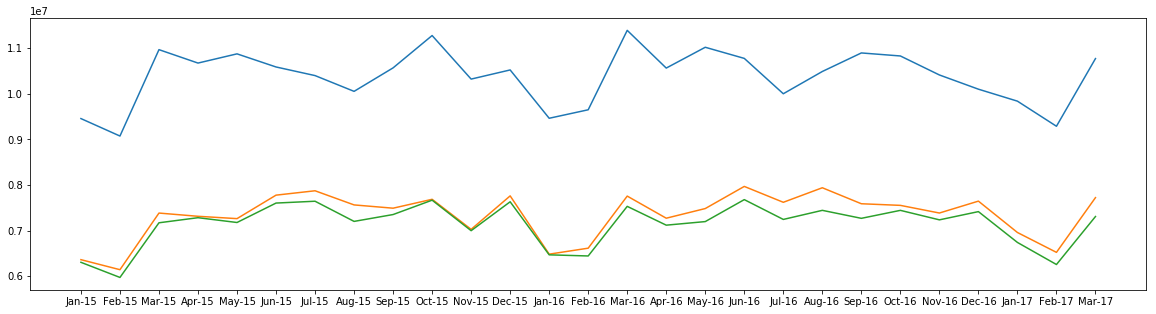

In [24]:
plt.figure(figsize=(20,5))
all_nonsub_chart = (plt.plot(people_bus['PLOT_LABELS'], people_bus['MONTHLY_ACTUAL']),
             plt.plot(people_long['PLOT_LABELS'], people_long['MONTHLY_ACTUAL']),
             plt.plot(people_north['PLOT_LABELS'], people_north['MONTHLY_ACTUAL']))

/Users/Wesson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


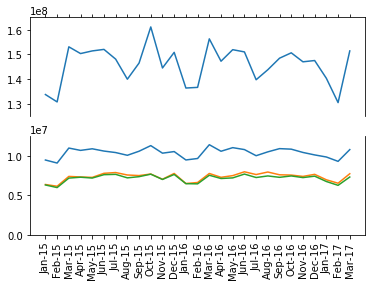

In [25]:
a=0; b=12500000; c=125000000; d=165000000
fig,(ax1,ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_ylim(c,d); ax2.set_ylim(a,b)    
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False); ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top(); ax1.tick_params(labeltop='off'); ax2.xaxis.tick_bottom()
for tick in ax2.get_xticklabels():
        tick.set_rotation(90)
ax1.plot(people_sub['PLOT_LABELS'],people_sub['MONTHLY_ACTUAL'])
ax2.plot(people_bus['PLOT_LABELS'], people_bus['MONTHLY_ACTUAL'])
ax2.plot(people_long['PLOT_LABELS'], people_long['MONTHLY_ACTUAL'])
ax2.plot(people_north['PLOT_LABELS'], people_north['MONTHLY_ACTUAL'])